# Preprocessing

  local authority: district / unitary (prior to April 2015)  \
0                                         Darlington          
1                                      County Durham          
2                                         Hartlepool          
3                                      Middlesbrough          
4                                     Northumberland          

   Arrived before 1961  Arrived 1961-1970  Arrived 1971-1980  \
0                  167                108                129   
1                  470                291                224   
2                  100                 64                 45   
3                  367                389                336   
4                  397                168                112   

   Arrived 1981-1990  Arrived 1991-2000  Arrived 2001-2003  Arrived 2004-2006  \
0                 77                 83                 42                 88   
1                152                175                 85                

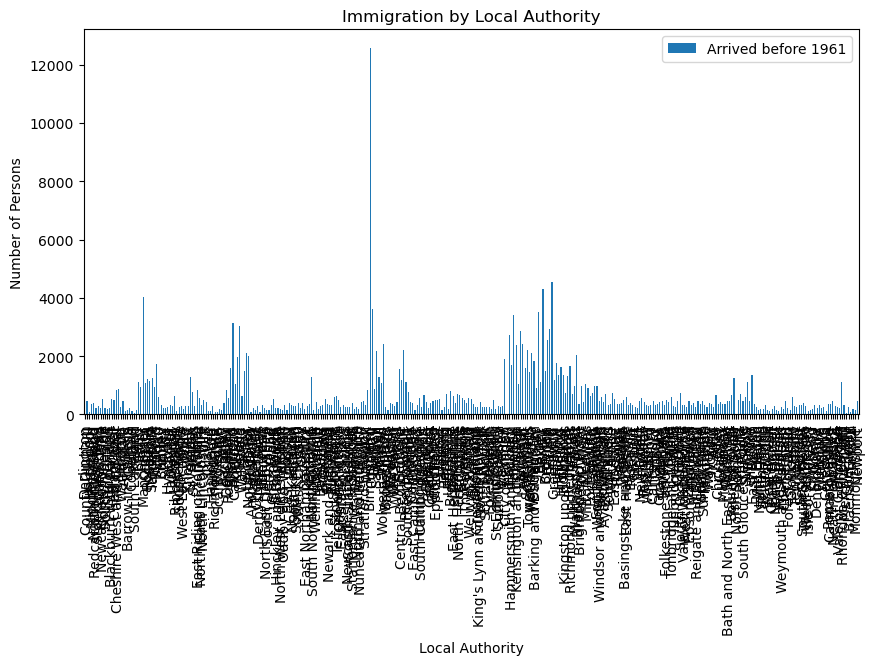

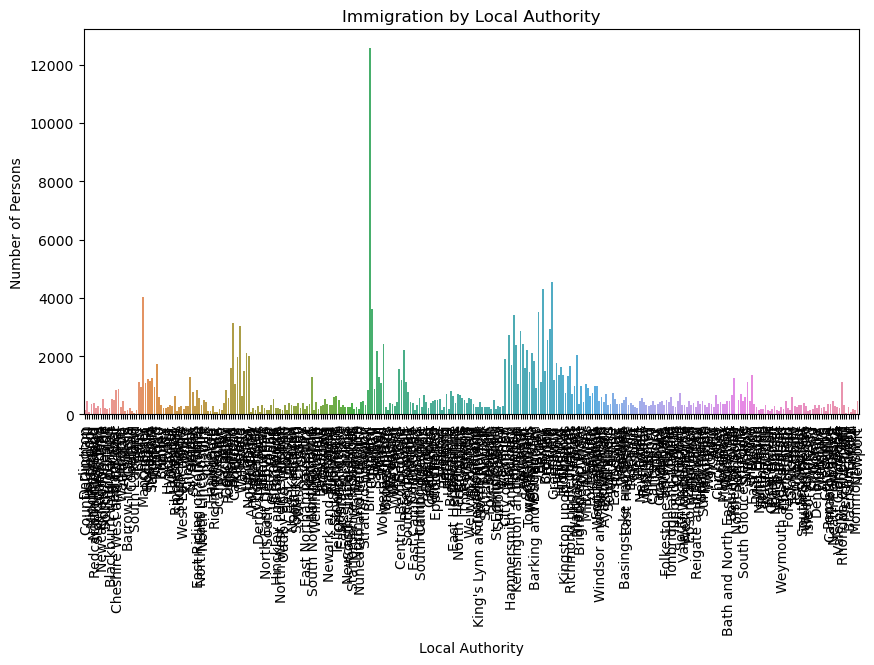

In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = '/Users/shubhibhadauriya/Desktop/VA_New/YOA.csv'

# Read the file and preprocess it by skipping initial irrelevant lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Find the index of the line containing the header
header_index = 0
for i, line in enumerate(lines):
    if "local authority" in line:
        header_index = i
        break

# Create a new file content with only the relevant lines
cleaned_lines = [lines[header_index]]
for line in lines[header_index+1:]:
    # Splitting the line by comma to check its content
    split_line = line.strip().split(',')
    # Checking if the line has the correct number of columns and if numeric columns contain numeric data
    if len(split_line) > 1 and all(x.isdigit() or x.replace('.', '', 1).isdigit() for x in split_line[1:] if x):
        cleaned_lines.append(line)

# Write the cleaned content to a new CSV string
cleaned_content = ''.join(cleaned_lines)

# Read the cleaned content into a pandas DataFrame
data = pd.read_csv(StringIO(cleaned_content))

# Display the first few rows of the dataframe to verify
print(data.head())
print(data.tail())

# Visualization Example 1: Bar Plot using Matplotlib
data.plot(kind='bar', x='local authority: district / unitary (prior to April 2015)', y='Arrived before 1961', figsize=(10, 5))
plt.title('Immigration by Local Authority')
plt.ylabel('Number of Persons')
plt.xlabel('Local Authority')
plt.xticks(rotation=90)
plt.show()

# Visualization Example 2: Bar Plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='local authority: district / unitary (prior to April 2015)', y='Arrived before 1961')
plt.title('Immigration by Local Authority')
plt.ylabel('Number of Persons')
plt.xlabel('Local Authority')
plt.xticks(rotation=90)
plt.show()


# Projection

## PCA 

DataFrame with PCA results:
  local authority: district / unitary (prior to April 2015)  \
0                                         Darlington          
1                                      County Durham          
2                                         Hartlepool          
3                                      Middlesbrough          
4                                     Northumberland          

   Arrived before 1961  Arrived 1961-1970  Arrived 1971-1980  \
0                  167                108                129   
1                  470                291                224   
2                  100                 64                 45   
3                  367                389                336   
4                  397                168                112   

   Arrived 1981-1990  Arrived 1991-2000  Arrived 2001-2003  Arrived 2004-2006  \
0                 77                 83                 42                 88   
1                152                175       

/var/folders/p6/7s8r37g12jg4n30jfwg636fc0000gn/T/ipykernel_3854/1206677423.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


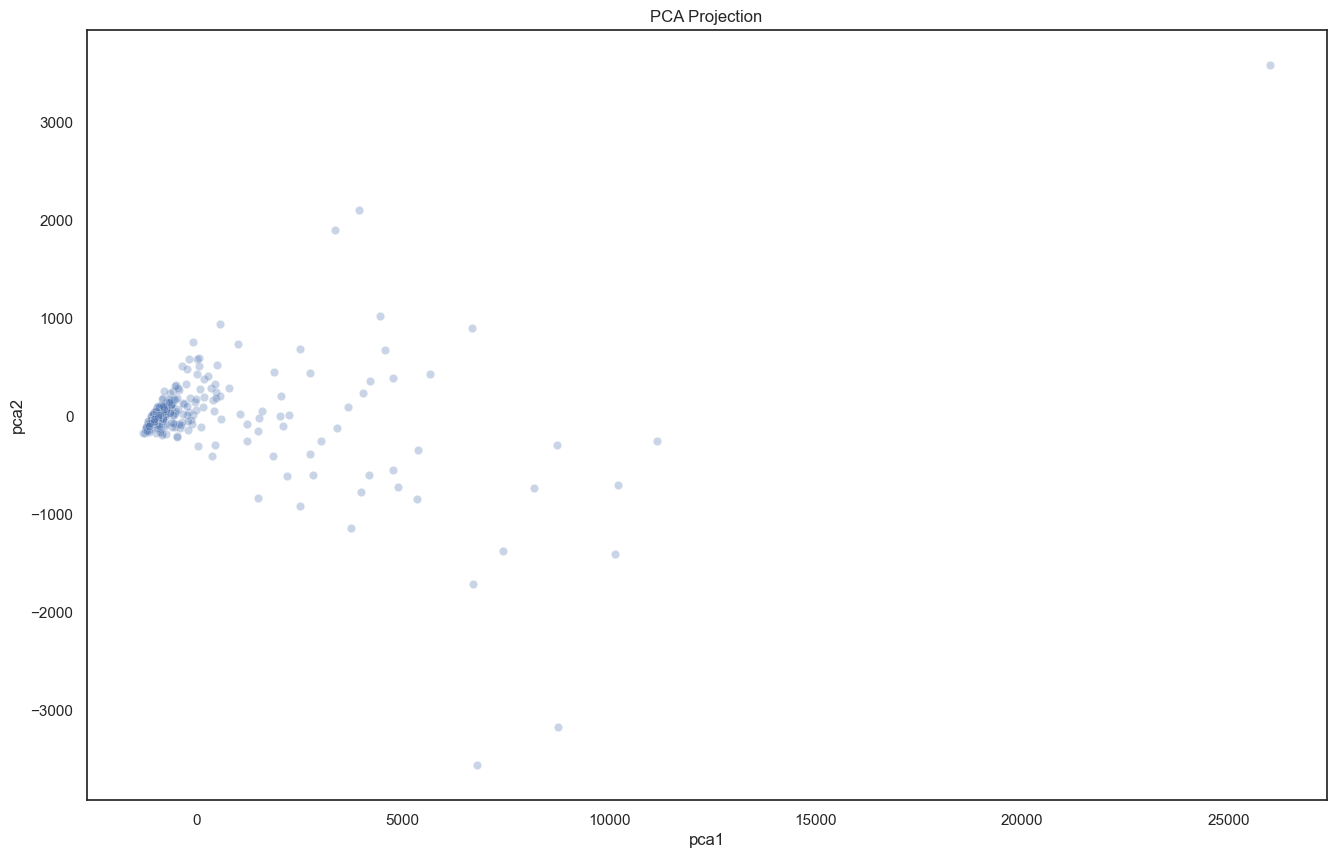

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all columns to numeric except the specified one
data_numeric = data.drop(columns=['local authority: district / unitary (prior to April 2015)']).apply(pd.to_numeric, errors='coerce')

# Fill any missing values with the mean of the respective column
data_numeric.fillna(data_numeric.mean(), inplace=True)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_numeric)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_results, columns=['pca1', 'pca2'])

# Add the original columns to the DataFrame
pca_df = pd.concat([data, pca_df], axis=1)

# Display the updated DataFrame
print("DataFrame with PCA results:")
print(pca_df.head())

# Set up the matplotlib figure
sns.set(style="white", context="notebook", rc={"figure.figsize":(14,10)})

# PCA Plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",
    palette=sns.color_palette("hsv", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)
plt.title("PCA Projection")
plt.show()

# Save the DataFrame to a new CSV file for Tableau visualization
pca_df.to_csv('/Users/shubhibhadauriya/Desktop/VA_New/YOA_2011_with_pca.csv', index=False)


## T-sne

In [3]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=1729)
tsne_results = tsne.fit_transform(data_numeric)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

# Add the original columns to the DataFrame
tsne_df = pd.concat([data, tsne_df], axis=1)

# Display the updated DataFrame
tsne_df.head()

local authority: district / unitary (prior to April 2015)  \
0                                         Darlington          
1                                      County Durham          
2                                         Hartlepool          
3                                      Middlesbrough          
4                                     Northumberland          

   Arrived before 1961  Arrived 1961-1970  Arrived 1971-1980  \
0                  167                108                129   
1                  470                291                224   
2                  100                 64                 45   
3                  367                389                336   
4                  397                168                112   

   Arrived 1981-1990  Arrived 1991-2000  Arrived 2001-2003  Arrived 2004-2006  \
0                 77                 83                 42                 88   
1                152                175                 85                178   
2                 41                 51                 32                 35   
3                221                337                258                293   
4                114                124                 56                 86   

   Arrived 2007-2009  Arrived 2010-2011      tsne1     tsne2  
0                101                 45 -18.653183  2.213134  
1                203                177   6.739317 -0.017392  
2                 47                 11 -28.522699  2.029636  
3                366                115  13.138477  1.675025  
4                131                 52  -1.179767 -1.385259

/var/folders/p6/7s8r37g12jg4n30jfwg636fc0000gn/T/ipykernel_3854/3614370351.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


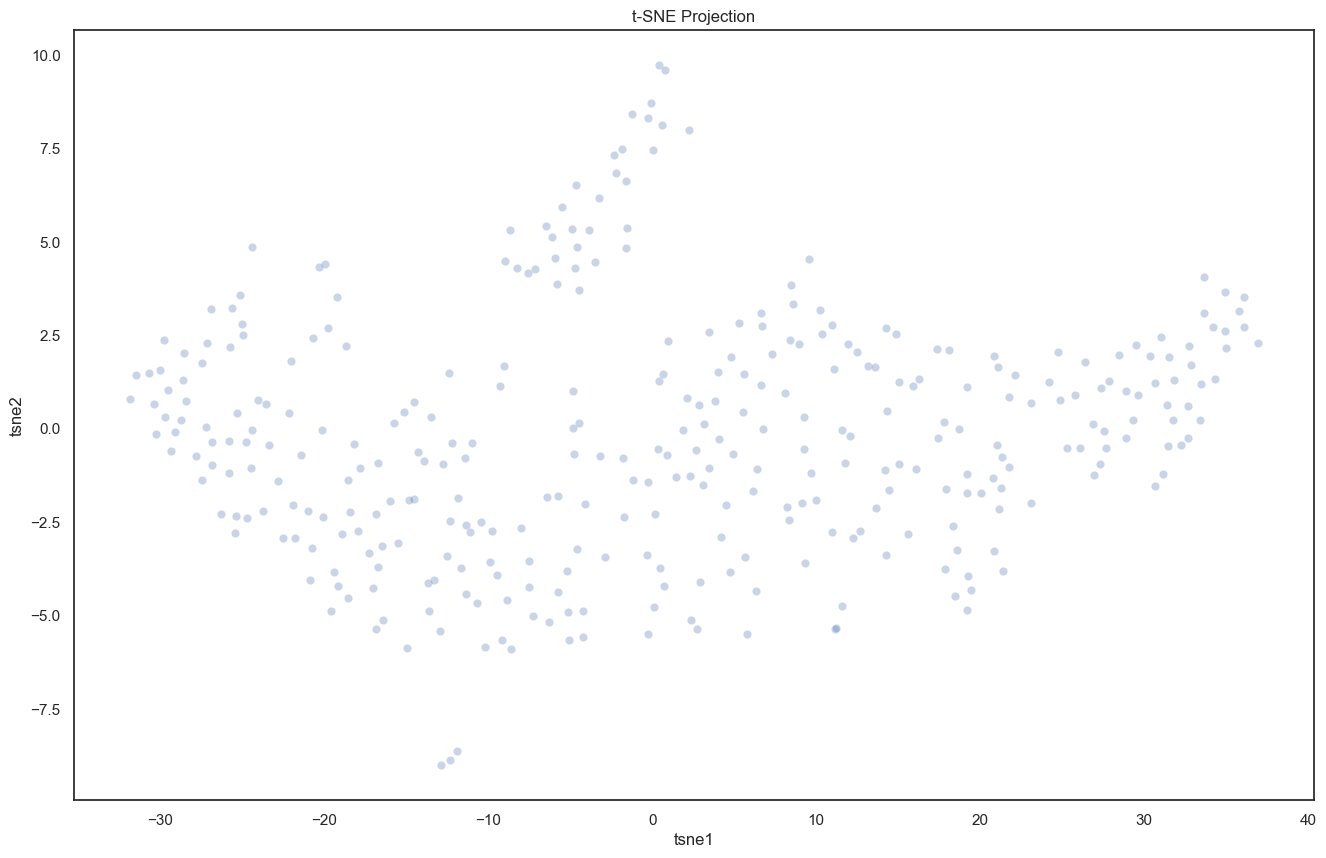

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
sns.set(style="white", context="notebook", rc={"figure.figsize":(14,10)})

# t-SNE Plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    palette=sns.color_palette("hsv", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)
plt.title("t-SNE Projection")
plt.show()


In [5]:
# Save the DataFrame to a new CSV file for Tableau visualization
tsne_df.to_csv('/Users/shubhibhadauriya/Desktop/VA_New/YOA_2011_with_tsne.csv', index=False)

# UMAP

In [6]:
pip install numpy==1.24.4


  Using cached numpy-1.24.4-cp310-cp310-macosx_10_9_x86_64.whl (19.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install umap-learn


  Using cached numpy-1.23.5-cp310-cp310-macosx_10_9_x86_64.whl (18.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.23.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


/Users/shubhibhadauriya/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


DataFrame with UMAP results:
  local authority: district / unitary (prior to April 2015)  \
0                                         Darlington          
1                                      County Durham          
2                                         Hartlepool          
3                                      Middlesbrough          
4                                     Northumberland          

   Arrived before 1961  Arrived 1961-1970  Arrived 1971-1980  \
0                  167                108                129   
1                  470                291                224   
2                  100                 64                 45   
3                  367                389                336   
4                  397                168                112   

   Arrived 1981-1990  Arrived 1991-2000  Arrived 2001-2003  Arrived 2004-2006  \
0                 77                 83                 42                 88   
1                152                175      

/var/folders/p6/7s8r37g12jg4n30jfwg636fc0000gn/T/ipykernel_3854/1754820617.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


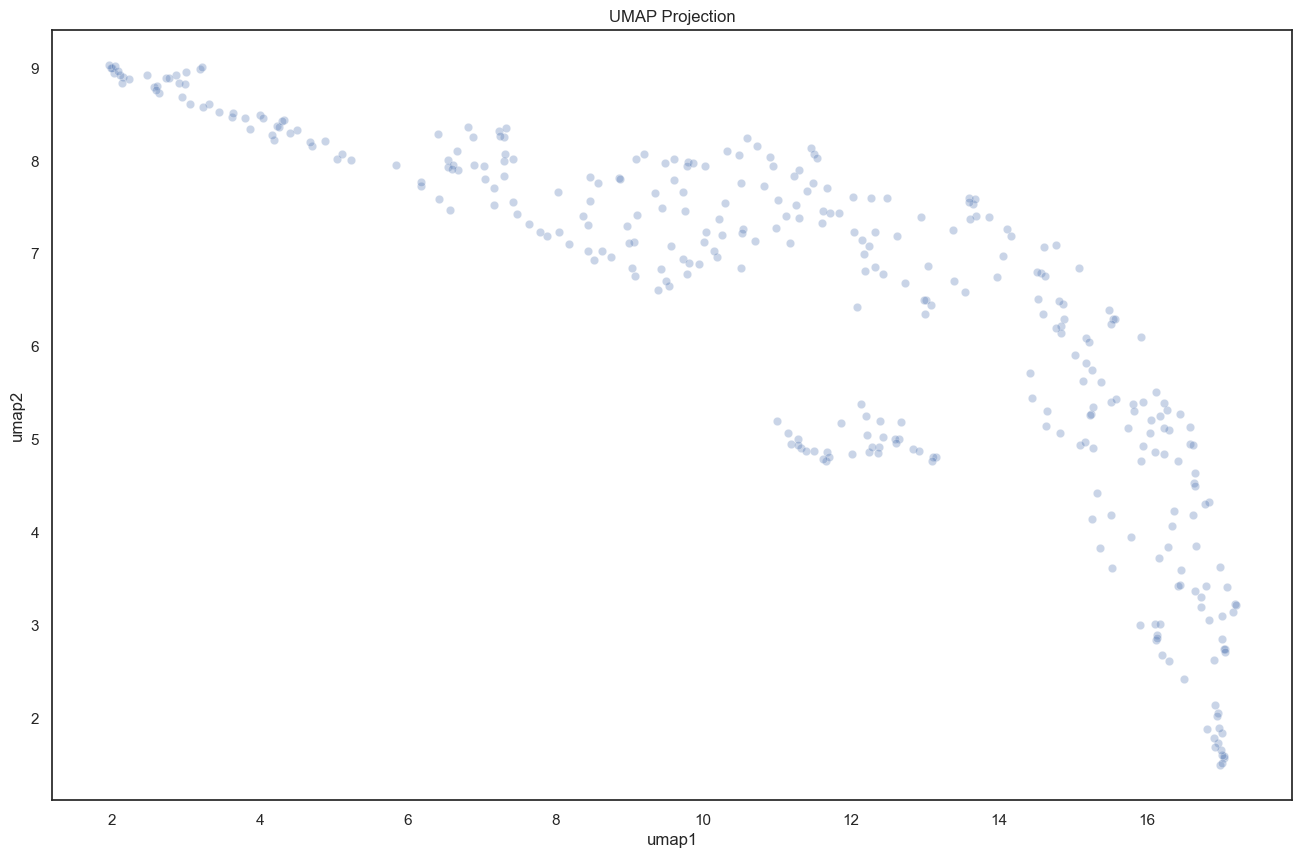

In [8]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_reducer.fit_transform(data_numeric)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['umap1', 'umap2'])

# Add the original columns to the DataFrame
umap_df = pd.concat([data, umap_df], axis=1)

# Display the updated DataFrame
print("DataFrame with UMAP results:")
print(umap_df.head())

# Set up the matplotlib figure
sns.set(style="white", context="notebook", rc={"figure.figsize":(14,10)})

# UMAP Plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap1", y="umap2",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3
)
plt.title("UMAP Projection")
plt.show()

# Save the DataFrame to a new CSV file for Tableau visualization
umap_df.to_csv('/Users/shubhibhadauriya/Desktop/VA_New/YOA_2011_with_umap.csv', index=False)



## Umap is best for this dataset.